# Iris Classifier with Pytorch
On this tutorial we will create a simple MLP (Multi-Layer Perceptron) Neural Network in Pytorch with the Iris Dataset.

#### References
* [Iris Dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set)
* [Feature Importance](https://chrisalbon.com/machine_learning/trees_and_forests/feature_importance/)
* https://www.geeksforgeeks.org/box-plot-and-histogram-exploration-on-iris-data/
* https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
* https://towardsdatascience.com/pca-vs-autoencoders-1ba08362f450
* https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html
* https://medium.com/@ally_20818/anomaly-detection-with-auto-encoders-how-we-used-it-for-cervical-cancer-detection-bdae74cbf05a
* https://medium.com/@harimittapalli/exploratory-data-analysis-iris-dataset-9920ea439a3e

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F

# load IRIS dataset
dataset = pd.read_csv('iris.csv')
num_classes = len(dataset.species.unique())
print('Classes:', dataset.species.unique())
num_features = len(dataset.columns) - 1
print('num_features:', num_features)

Classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
num_features: 4


In [2]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


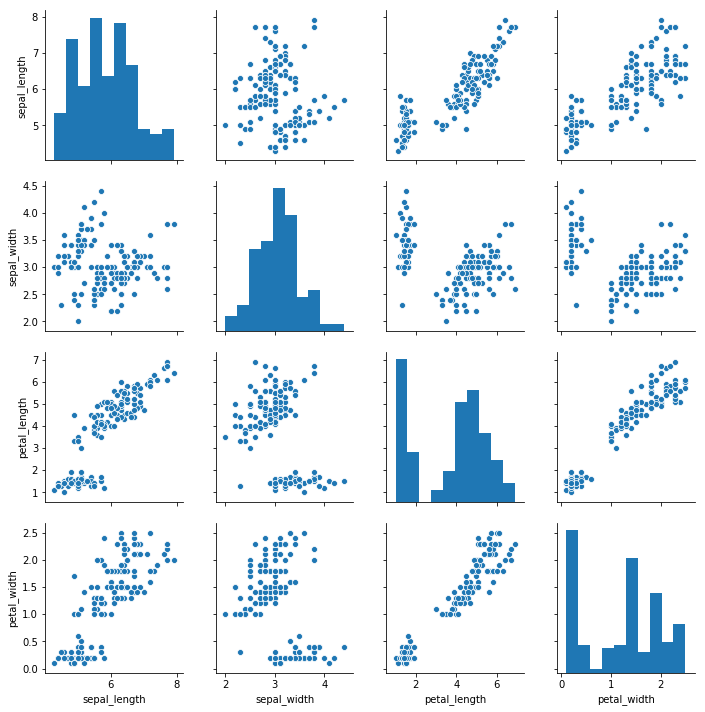

In [3]:
sns.pairplot(dataset)

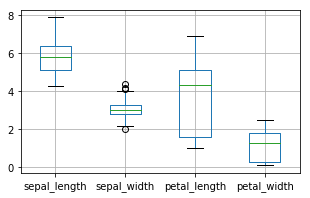

In [4]:
plt.figure(figsize = (5, 3)) 
dataset[["sepal_length", "sepal_width", "petal_length", "petal_width"]].boxplot()

#### Transform Species to a number

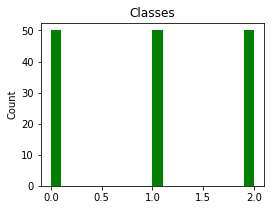

In [5]:
# transform species to numerics
dataset.loc[dataset.species=='Iris-setosa', 'species'] = 0
dataset.loc[dataset.species=='Iris-versicolor', 'species'] = 1
dataset.loc[dataset.species=='Iris-virginica', 'species'] = 2

# Display classes histogram
plt.figure(figsize = (4, 3)) 
x = dataset["species"] 
plt.hist(x, bins = 20, color = "green");
plt.title("Classes");
plt.ylabel("Count"); 

#### Split Train/Test

In [6]:
train_X, test_X, train_y, test_y = train_test_split(dataset[dataset.columns[0:4]].values,
                                                    dataset.species.values, test_size=0.3);

# wrap up with Variable in pytorch
train_X = torch.Tensor(train_X).float()
test_X = torch.Tensor(test_X).float()
train_y = torch.Tensor(train_y).long()
test_y = torch.Tensor(test_y).long()

#### Define a Neural Network

In [7]:
class IrisClassifier(nn.Module):
    # define nn
    def __init__(self, num_classes, num_features, num_hidden=100):
        super(IrisClassifier, self).__init__()
        self.fc1 = nn.Linear(num_features, num_hidden)
        self.fc2 = nn.Linear(num_hidden, num_hidden)
        self.fc3 = nn.Linear(num_hidden, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = self.fc2(X)
        X = self.fc3(X)
        X = self.softmax(X)

        return X

#### Initialize Neural Network, Optmizer and Loss

In [8]:
net = IrisClassifier(num_classes, num_features)
criterion = nn.CrossEntropyLoss()# cross entropy loss
#optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

In [9]:
for epoch in range(2000):
    optimizer.zero_grad()
    out = net(train_X)
    loss = criterion(out, train_y)
    loss.backward()
    optimizer.step()
    
    if epoch % 500 == 0:
        print ('number of epoch', epoch, 'loss', loss.item())

predict_out = net(test_X)
_, predict_y = torch.max(predict_out, 1)

number of epoch 0 loss 1.1174818277359009
number of epoch 500 loss 0.7098897099494934
number of epoch 1000 loss 0.6196004152297974
number of epoch 1500 loss 0.5955753922462463


In [10]:
print('prediction accuracy', accuracy_score(test_y.data, predict_y.data))
print('Precision', precision_score(test_y.data, predict_y.data, average='macro'))
print('Recall', recall_score(test_y.data, predict_y.data, average='macro'))
print('F1:', f1_score(test_y.data, predict_y.data, average='macro'))

prediction accuracy 0.9555555555555556
Precision 0.9649122807017544
Recall 0.9393939393939394
F1: 0.9481481481481481
